# 4.Logistic Regression

### 공부 시간에 따른 자격증 시험 합격 가능성

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =0)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

### 6시간 공부했을 때 예측?

In [11]:
classifier.predict([[6]])
# 결과 1 : 합격할 것으로 예측


array([1], dtype=int64)

In [14]:
classifier.predict_proba([[6]]) # 합격할 확률 출력
# 불합격 확률 14% 합격확률 86%

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 예측?

In [12]:
classifier.predict([[4]])
# 결과 0 : 불합격할 것으로 예측

array([0], dtype=int64)

In [15]:
classifier.predict_proba([[4]])
# 불합격 확률 62% 합격 확률 38%

array([[0.6249966, 0.3750034]])

### 분류 결과 예측(테스트 세트)

In [17]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1], dtype=int64)

In [18]:
y_test # 실제 값 (테스트 세트)

array([1, 0, 1, 0], dtype=int64)

In [20]:
X_test # 공부 시간(테스트 세트)

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [21]:
classifier.score(X_test,y_test) # 모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 

0.75

### 데이터 시각화(훈련 세트)

In [23]:
X_range = np.arange(min(X), max(X),0.1) # X의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [27]:
p = 1 / (1+np.exp(classifier.coef_*X_range + classifier.intercept_)) # y = mx + b
p

array([[0.98964295, 0.98838753, 0.98698193, 0.9854087 , 0.98364851,
        0.98167992, 0.97947927, 0.97702047, 0.97427479, 0.97121071,
        0.96779374, 0.96398625, 0.95974736, 0.95503281, 0.94979495,
        0.94398278, 0.93754198, 0.93041521, 0.92254243, 0.91386139,
        0.90430835, 0.89381894, 0.88232933, 0.86977759, 0.85610532,
        0.84125957, 0.82519491, 0.80787578, 0.7892789 , 0.76939575,
        0.74823491, 0.72582426, 0.70221268, 0.67747126, 0.65169384,
        0.6249966 , 0.59751685, 0.56941073, 0.54085011, 0.51201858,
        0.48310686, 0.45430779, 0.42581124, 0.39779912, 0.3704409 ,
        0.34388976, 0.31827956, 0.29372278, 0.27030941, 0.24810676,
        0.22716006, 0.20749379, 0.18911348, 0.17200797, 0.15615172,
        0.14150735, 0.128028  , 0.11565964, 0.10434317, 0.09401623,
        0.08461479, 0.07607454, 0.06833192, 0.06132501, 0.0549942 ,
        0.04928262, 0.04413654, 0.03950547, 0.03534236, 0.03160353,
        0.02824864, 0.02524061, 0.02254545, 0.02

In [28]:
p.shape


(1, 95)

In [29]:
X_range.shape

(95,)

In [30]:
p = p.reshape(-1) # 1차원 배열 형태로 변경
p.shape

(95,)

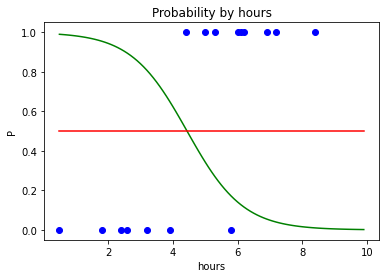

In [32]:
plt.scatter(X_train,y_train, color= 'blue')
plt.plot(X_range, p, color = 'green')
plt.plot(X_range, np.full(len(X_range),0.5), color = 'red') # X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 데이터 시각화(테스트 세트)

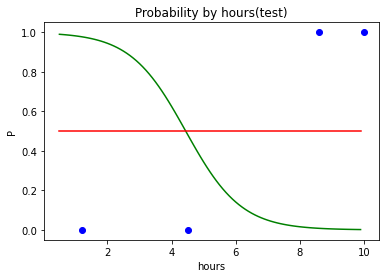

In [33]:
plt.scatter(X_test,y_test, color= 'blue')
plt.plot(X_range, p, color = 'green')
plt.plot(X_range, np.full(len(X_range),0.5), color = 'red') # X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.title('Probability by hours(test)')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [37]:
classifier.predict_proba([[4.5]]) # 4.5 시간 공부했을 때 확률( 모델에서는 합격 예측, 실제로는 불합격)

array([[0.48310686, 0.51689314]])

### 혼돈 행렬(Confusion Matrix)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

# TRUE NEGATIBE (TN)        FALSE POSITIVE(FP)
# 불합격일거야(예측)       합격일거야 (예측)
# 불합격(실제)               불합격(실제)
# FALSE NEGATIVE(FN)        TRUE POSITIVE(TP)
# 불합격일거야(예측)       합격일거야 (예측)
# 합격(실제)               합격(실제)


array([[1, 1],
       [0, 2]], dtype=int64)